### A model to predict whether a business(yelp) is of 1 star or 5 stars.

In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.head()
# 'stars' are the ratings given to businesses by users.
# 'text' is the reviews given by users.
# 'cool', 'useful', 'funny' are the labels given by the users to reviews of other users.

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [6]:
yelp.describe()
# minimum star is 1 and maximum star is 5.

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [4]:
# now calculate text length of reviews
yelp['text_length'] = yelp['text'].apply(len)

In [5]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [6]:
# now find the largest text and smallest text or review
yelp.describe()

,stars,cool,useful,funny,text_length
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300,710.738700
std,1.214636,2.067861,2.336647,1.907942,617.399827
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,0.000000,0.000000,0.000000,294.000000
50%,4.000000,0.000000,1.000000,0.000000,541.500000
75%,5.000000,1.000000,2.000000,1.000000,930.000000
max,5.000000,77.000000,76.000000,57.000000,4997.000000


In [10]:
# shortest review has one character only and the larget review has 4997 characters.
# but what are those reviews, let's check.

In [7]:
yelp[yelp['text_length'] == 4997]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
55,FCcFT610nQBVcRdY-devQA,2012-01-14,6jRs2P6zTYMn36fVnCu1Zw,4,"In our continuing quest to identify cool, loca...",review,40aklZ2SQPKnlTPZdvAqww,0,1,0,4997


In [8]:
# let's see the whole review
yelp['text'].iloc[55]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

In [9]:
# the shortest text
yelp[yelp['text_length'] == 1]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
6450,tbRu-3NR5za1SEZkszcp5Q,2012-01-03,IVoMGfn9QrZ4dATwc9HBcg,3,X,review,SHcX9hp5RG3-OqsbvissIQ,0,0,0,1


In [10]:
yelp['text'].iloc[6450]

'X'

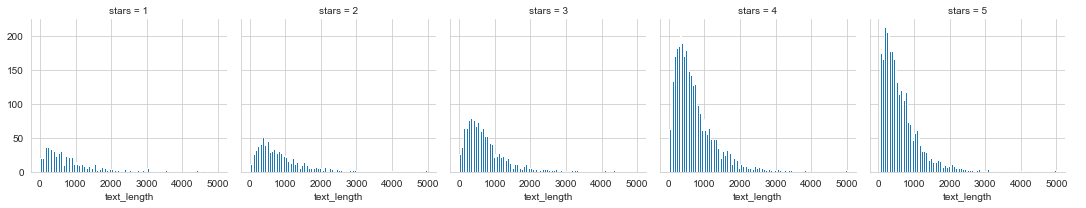

In [11]:
fig = sns.FacetGrid(data = yelp, col = 'stars')
fig.map(plt.hist, 'text_length', bins = 100).add_legend()
plt.show()

<AxesSubplot:xlabel='stars', ylabel='count'>

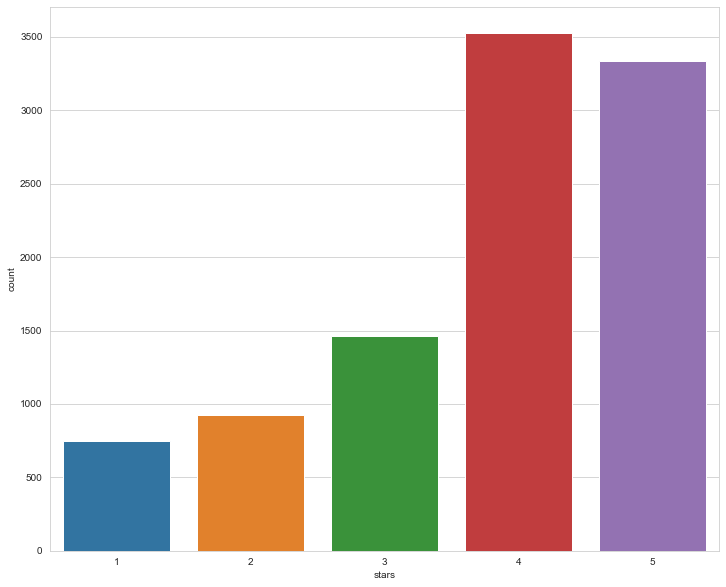

In [12]:
plt.figure(figsize = (12,10))
sns.countplot(x = 'stars', data = yelp)
# it seems very clear that users mostly give 4 and 5 ratings to their businesses.

<AxesSubplot:xlabel='stars', ylabel='text_length'>

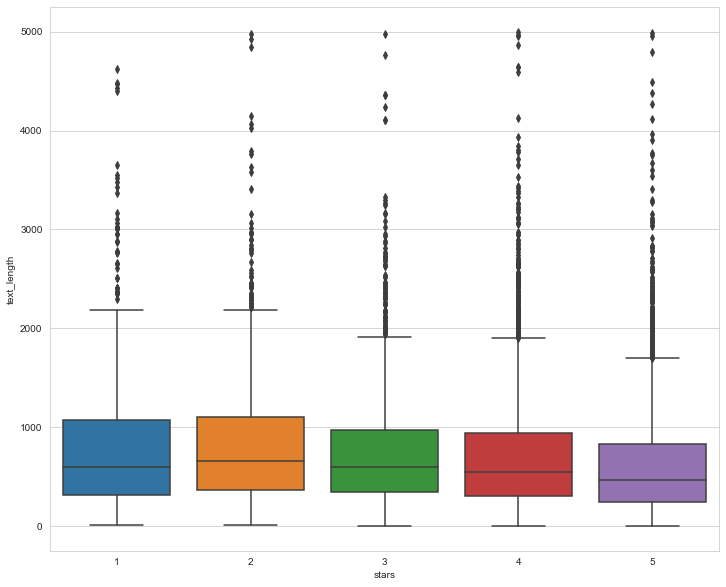

In [13]:
plt.figure(figsize = (12,10))
sns.boxplot(data = yelp, x = 'stars', y = 'text_length')
# relatively, large text length reviews are of 4 or 5 ratings but outliers are present in all ratings. So from here we can 
# conclude that ratings don't clearly depend on text length. A user can give 1 star with a large review and vice-versa.

<AxesSubplot:xlabel='text_length', ylabel='cool'>

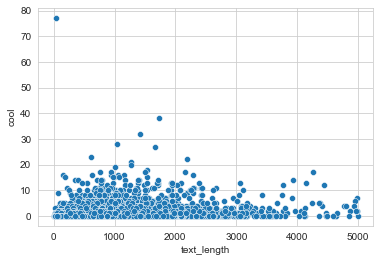

In [14]:
sns.scatterplot(data = yelp, x = 'text_length', y = 'cool')

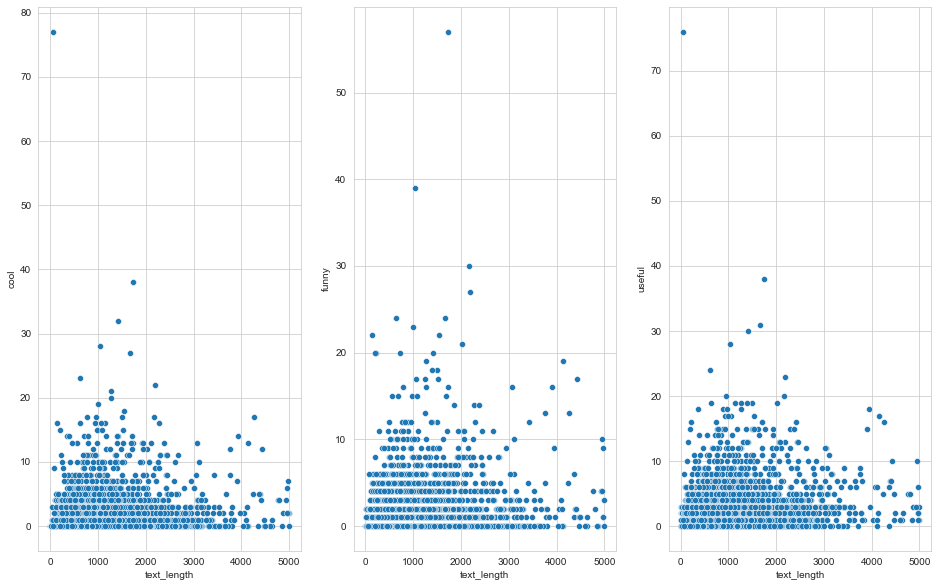

In [15]:
graph,axes = plt.subplots(nrows = 1, ncols = 3, sharex = True, figsize = (16,10))
k1 = sns.scatterplot(data = yelp, x = 'text_length', y = 'cool', ax = axes[0])
k2 = sns.scatterplot(data = yelp, x = 'text_length', y = 'funny', ax = axes[1])
k3 = sns.scatterplot(data = yelp, x = 'text_length', y = 'useful', ax = axes[2])

In [5]:
yelp.groupby('stars').mean().corr()
# relatioin between 'cool', 'useful', 'funny' and 'text_length'

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


<AxesSubplot:>

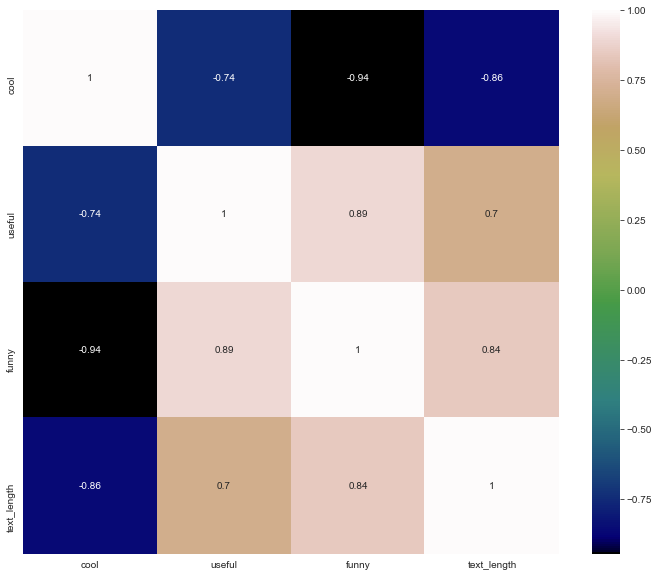

In [17]:
#let's represent this data on heatmap.
plt.figure(figsize = (12,10))
sns.heatmap(yelp.groupby('stars').mean().corr(),cmap = 'gist_earth', annot = True)

In [7]:
# now it's time to filter our data as star = 1 or 5 only.
yelp_15 = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]

In [20]:
yelp_15.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [8]:
X = yelp_15['text']
Y = yelp_15['stars']

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
# By CountVectorizer we will make bag of words.

In [10]:
vectorizer = CountVectorizer()

In [11]:
vector = vectorizer.fit_transform(X)

In [14]:
print(vector.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
print(vector)

  (0, 11265)	2
  (0, 18735)	1
  (0, 17406)	1
  (0, 10635)	1
  (0, 8161)	2
  (0, 11821)	3
  (0, 1984)	1
  (0, 6864)	1
  (0, 2364)	1
  (0, 937)	8
  (0, 9114)	9
  (0, 18517)	8
  (0, 6123)	3
  (0, 17126)	10
  (0, 18585)	1
  (0, 12505)	1
  (0, 18672)	1
  (0, 10300)	2
  (0, 15422)	1
  (0, 12016)	1
  (0, 12054)	1
  (0, 17134)	4
  (0, 7715)	1
  (0, 921)	1
  (0, 407)	1
  :	:
  (4085, 9817)	1
  (4085, 10088)	1
  (4085, 9127)	1
  (4085, 10873)	1
  (4085, 2154)	1
  (4085, 183)	1
  (4085, 10907)	1
  (4085, 17416)	1
  (4085, 6370)	1
  (4085, 3314)	1
  (4085, 3329)	1
  (4085, 14423)	1
  (4085, 1442)	1
  (4085, 16134)	1
  (4085, 15944)	1
  (4085, 6651)	1
  (4085, 12298)	1
  (4085, 543)	1
  (4085, 17700)	1
  (4085, 2515)	1
  (4085, 189)	1
  (4085, 9624)	1
  (4085, 5510)	1
  (4085, 836)	1
  (4085, 15962)	1


In [27]:
vector.shape

(4086, 19183)

In [28]:
vectorizer.vocabulary_

{'my': 11265,
 'wife': 18735,
 'took': 17406,
 'me': 10635,
 'here': 8161,
 'on': 11821,
 'birthday': 1984,
 'for': 6864,
 'breakfast': 2364,
 'and': 937,
 'it': 9114,
 'was': 18517,
 'excellent': 6123,
 'the': 17126,
 'weather': 18585,
 'perfect': 12505,
 'which': 18672,
 'made': 10300,
 'sitting': 15422,
 'outside': 12016,
 'overlooking': 12054,
 'their': 17134,
 'grounds': 7715,
 'an': 921,
 'absolute': 407,
 'pleasure': 12846,
 'our': 11982,
 'waitress': 18440,
 'food': 6835,
 'arrived': 1207,
 'quickly': 13554,
 'semi': 14998,
 'busy': 2646,
 'saturday': 14725,
 'morning': 11119,
 'looked': 10130,
 'like': 9947,
 'place': 12778,
 'fills': 6567,
 'up': 18042,
 'pretty': 13186,
 'so': 15671,
 'earlier': 5610,
 'you': 19066,
 'get': 7333,
 'better': 1905,
 'do': 5281,
 'yourself': 19077,
 'favor': 6419,
 'bloody': 2095,
 'mary': 10524,
 'phenomenal': 12599,
 'simply': 15380,
 'best': 1893,
 've': 18192,
 'ever': 6074,
 'had': 7844,
 'sure': 16615,
 'they': 17163,
 'only': 11832,
 'us

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
Mx_train,Mx_test, My_train, My_test = train_test_split(vector,Y, test_size = 0.3, random_state = 101)

In [14]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
NB = MultinomialNB()

In [17]:
NB.fit(Mx_train, My_train)

MultinomialNB()

In [18]:
predict = NB.predict(Mx_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
print(confusion_matrix(My_test, predict))
print('\n')
print(classification_report(My_test, predict))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [66]:
# now let's do this with tfidf model

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer

In [21]:
tfidf = TfidfTransformer()

In [23]:
tfidf_trans = tfidf.fit_transform(vector)

In [41]:
print(tfidf_trans)

  (0, 19077)	0.08951265461934695
  (0, 19066)	0.06622648755374887
  (0, 18826)	0.06458019835849602
  (0, 18735)	0.0851842985244348
  (0, 18698)	0.08617600100688819
  (0, 18674)	0.0648319380107111
  (0, 18672)	0.051861984050418156
  (0, 18663)	0.04595741027729103
  (0, 18585)	0.10982481560294714
  (0, 18517)	0.2534006020922845
  (0, 18440)	0.08740375508004294
  (0, 18432)	0.06206987356529697
  (0, 18200)	0.10923198249255536
  (0, 18192)	0.09872368273435814
  (0, 18100)	0.07815761193619283
  (0, 18042)	0.046355563411668924
  (0, 17667)	0.1233800009966854
  (0, 17406)	0.06893109256756408
  (0, 17346)	0.09911891271114348
  (0, 17344)	0.02362433227717681
  (0, 17163)	0.03310334572494354
  (0, 17137)	0.05349900625320795
  (0, 17134)	0.17836202775778873
  (0, 17126)	0.20738270407707843
  (0, 16913)	0.07455170815134718
  :	:
  (4085, 9116)	0.12301138625537562
  (4085, 9097)	0.10860346820427218
  (4085, 8853)	0.12130480913514378
  (4085, 7990)	0.06906634500131581
  (4085, 7635)	0.05203772947570

In [42]:
# we can find index of a particular word
vectorizer.vocabulary_['wife']

18735

In [43]:
# now by using this index we can find its weight in a particular document from tfidf
tfidf.idf_[vectorizer.vocabulary_['wife']]

4.561976292457913

In [24]:
class_15 = MultinomialNB()

In [25]:
tfidf_train, tfidf_test, Ytf_train, Ytf_test = train_test_split(tfidf_trans, yelp_15['stars'], test_size = 0.3, random_state = 101)

In [26]:
class_15.fit(tfidf_train, Ytf_train)

MultinomialNB()

In [27]:
pro = class_15.predict(tfidf_test)

In [33]:
print(confusion_matrix(Ytf_test, pro))
print('\n')
print(classification_report(Ytf_test, pro))

[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



In [95]:
# tfidf has worsen the result

In [96]:
# now what if we could do all these things in one go!!
# we can do it by using pipeline

In [28]:
from sklearn.pipeline import Pipeline

In [29]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [30]:
pipe_train, pipe_test, Y_train, Y_test = train_test_split(yelp_15['text'], yelp_15['stars'], test_size = 0.3, random_state = 101)

In [31]:
pipeline.fit(pipe_train, Y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [32]:
pred = pipeline.predict(pipe_test)

In [39]:
print(confusion_matrix(Y_test, pred))
print('\n')
print(classification_report(Y_test, pred))

[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\taufe\programming_softwares\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
# now what if we change the classifier
# let's try this

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

In [35]:
pr_train = pipe_train
pry_train = Y_train
pr_test = pipe_test
pry_test = Y_test

In [36]:
pipeline.fit(pr_train, pry_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [37]:
pred = pipeline.predict(pr_test)

In [45]:
print(confusion_matrix(pry_test, pred)),
print('\n'),
print(classification_report(pry_test, pred))

[[ 44 184]
 [  1 997]]


              precision    recall  f1-score   support

           1       0.98      0.19      0.32       228
           5       0.84      1.00      0.92       998

    accuracy                           0.85      1226
   macro avg       0.91      0.60      0.62      1226
weighted avg       0.87      0.85      0.80      1226



In [38]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('classifier', RandomForestClassifier())
])

In [39]:
a = yelp_15['text']
b = yelp_15['stars']

In [40]:
a_train, a_test, b_train, b_test = train_test_split(a,b, test_size = 0.3, random_state = 101)

In [41]:
pipeline.fit(a_train, b_train)

Pipeline(steps=[('bow', CountVectorizer()),
                ('classifier', RandomForestClassifier())])

In [42]:
pre = pipeline.predict(a_test)

In [51]:
print(confusion_matrix(b_test, pre))
print('\n')
print(classification_report(b_test, pre))

[[ 66 162]
 [  3 995]]


              precision    recall  f1-score   support

           1       0.96      0.29      0.44       228
           5       0.86      1.00      0.92       998

    accuracy                           0.87      1226
   macro avg       0.91      0.64      0.68      1226
weighted avg       0.88      0.87      0.83      1226



In [43]:
from sklearn import metrics

In [44]:
Multi_pre_tfidf = metrics.precision_score(y_true = Ytf_test, y_pred = pro, zero_division = 1)
Multi_f1_tfidf = metrics.f1_score(y_true = Ytf_test, y_pred = pro, zero_division = 1)

In [45]:
Multi_pre = metrics.precision_score(y_true = My_test, y_pred = predict)
Multi_f1 = metrics.f1_score(y_true = My_test, y_pred = predict)

In [46]:
Rand_pre_tfidf = metrics.precision_score(y_true = pry_test, y_pred = pred)
Rand_f1_tfidf = metrics.f1_score(y_true = pry_test, y_pred = pred)

In [47]:
Rand_pre = metrics.precision_score(y_true = b_test, y_pred = pre)
Rand_f1 = metrics.f1_score(y_true = b_test, y_pred = pre)

In [48]:
# comparison of precision with tf-idf
print('precision for MultinomialNB classifier with tf-idf is {}'.format(Multi_pre_tfidf))
print('precision for RandomForest classifier with tf-idf is {}'.format(Rand_pre_tfidf))

precision for MultinomialNB classifier with tf-idf is 1.0
precision for RandomForest classifier with tf-idf is 0.9512195121951219


In [58]:
# comparison of precision without tf-idf
print('precision for MultinomialNB classifier without tf-idf is {}'.format(Multi_pre))
print('precision for RandomForest classifier without tf-idf is {}'.format(Rand_pre))

precision for MultinomialNB classifier without tf-idf is 0.8784530386740331
precision for RandomForest classifier without tf-idf is 0.9565217391304348


In [59]:
# comparison of f1 score with tf-idf
print('f1 for MultinomialNB classifier with tf-idf is {}'.format(Multi_f1_tfidf))
print('f1 for RandomForest classifier with tf-idf is {}'.format(Rand_f1_tfidf))

f1 for MultinomialNB classifier with tf-idf is 0.0
f1 for RandomForest classifier with tf-idf is 0.3223443223443223


In [60]:
# comparison of f1 score without tf-idf
print('f1 for MultinomialNB classifier without tf-idf is {}'.format(Multi_f1))
print('f1 for RandomForest classifier without tf-idf is {}'.format(Rand_f1))

f1 for MultinomialNB classifier without tf-idf is 0.7775061124694376
f1 for RandomForest classifier without tf-idf is 0.4444444444444444


In [49]:
from mlxtend.plotting import plot_confusion_matrix

In [96]:
def confusion(x,y):
    cm_mn_tfidf = confusion_matrix(x, y)
    plt.figure()
    plot_confusion_matrix(cm_mn_tfidf, figsize = (12,10))
    plt.xticks(np.arange(2), ['star - 1', 'star- 5'], fontsize = 16)
    plt.yticks(np.arange(2), ['star - 1', 'star - 5'], fontsize = 16)
    plt.show()

In [97]:
tup = [(Ytf_test, pro),(My_test, predict),(pry_test, pred),(b_test, pre)]

<Figure size 432x288 with 0 Axes>

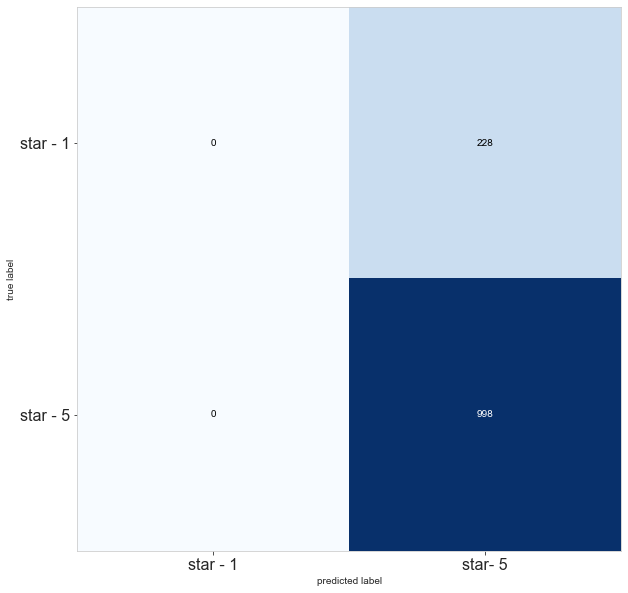

<Figure size 432x288 with 0 Axes>

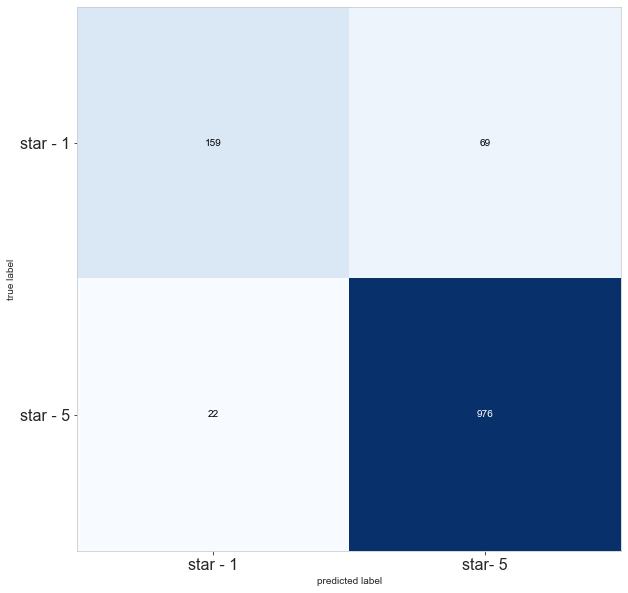

<Figure size 432x288 with 0 Axes>

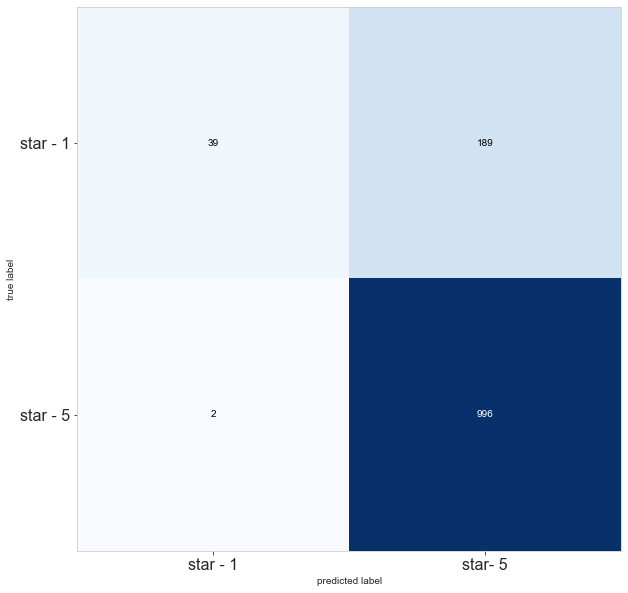

<Figure size 432x288 with 0 Axes>

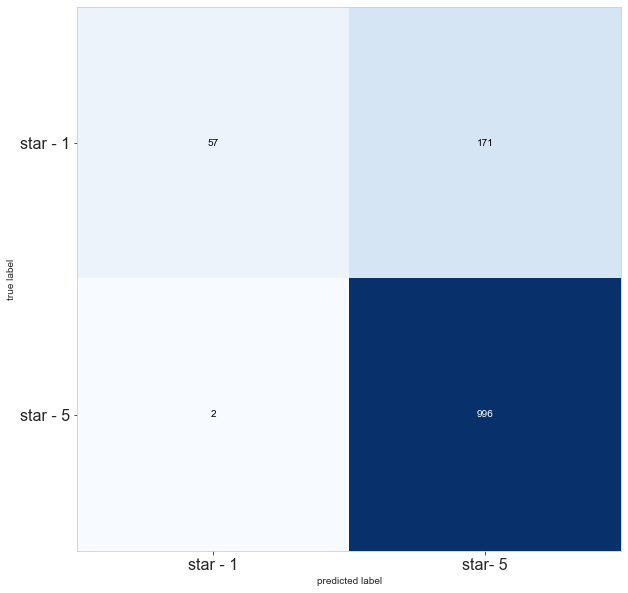

In [98]:
for m,n in tup:
    confusion(m,n)